In [1]:
import os
import numpy as np
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("figure", figsize=(10,10))
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
from src.netcdf_functions import pcolormesh_basemapplot

### Examining Data

In [2]:
data_directory = '/data/climatedata/'
metum_cube = iris.load(f'{data_directory}metum_cube_lres.nc')[0]
metum_cube

Snowfall Flux (kg m-2 s-1),time,grid_latitude,grid_longitude
Shape,13514,98,126
Dimension coordinates,,,
time,x,-,-
grid_latitude,-,x,-
grid_longitude,-,-,x
Auxiliary coordinates,,,
day_of_year,x,-,-
forecast_period,x,-,-
forecast_reference_time,x,-,-
year,x,-,-


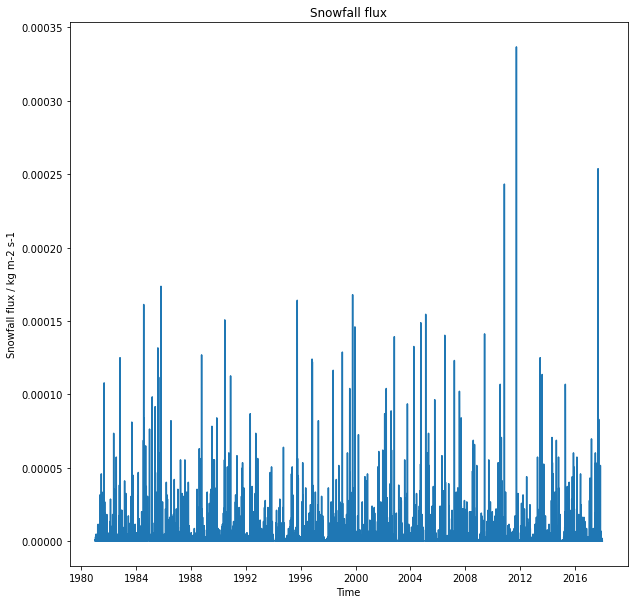

In [3]:
# Plotting the daily timeseries of snowfall for a particular grid cell.
grid_lat,grid_lon = 50,50
qplt.plot(metum_cube[:,grid_lat,grid_lon])

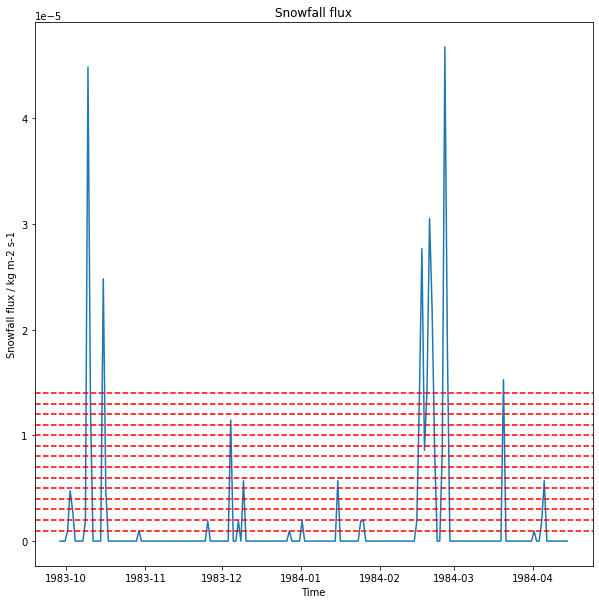

In [4]:
# Zoomed in plot of daily snowfall showing the discreet nature of small values.
grid_lat,grid_lon = 50,50
qplt.plot(metum_cube[1000:1200,grid_lat,grid_lon])
for y in np.arange(0.1*10**-5,1.5*10**-5,0.1*10**-5):
    plt.axhline(y=y, color='r', linestyle='--')

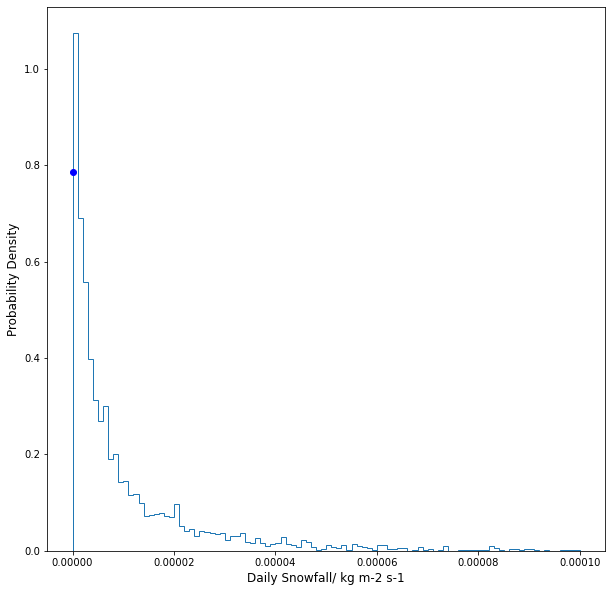

In [5]:
# Plotting the Probability Distribution as a Histogram
grid_lat,grid_lon = 50,50
data = metum_cube[:,grid_lat,grid_lon].data
bins = np.arange(0,10**-4,10**-6)
p = len(data[data!=0])/len(data)
weight_value = p/len(bins)
weights = np.full(len(data[data!=0]),weight_value)

plt.hist(data[data!=0], bins=bins,histtype='step', stacked=True,fill=False,weights=weights)
plt.plot(0,1-len(data[data!=0])/len(data),'bo')
plt.xlabel('Daily Snowfall/ kg m-2 s-1', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()

In [6]:
cube

<iris 'Cube' of snowfall_flux / (kg m-2 s-1) (grid_latitude: 98; grid_longitude: 126)>

/data/conda/bc/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'day_of_year'.
  warnings.warn(msg.format(self.name()))
/data/conda/bc/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/data/conda/bc/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_reference_time'.
  warnings.warn(msg.format(self.name()))
/data/conda/bc/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


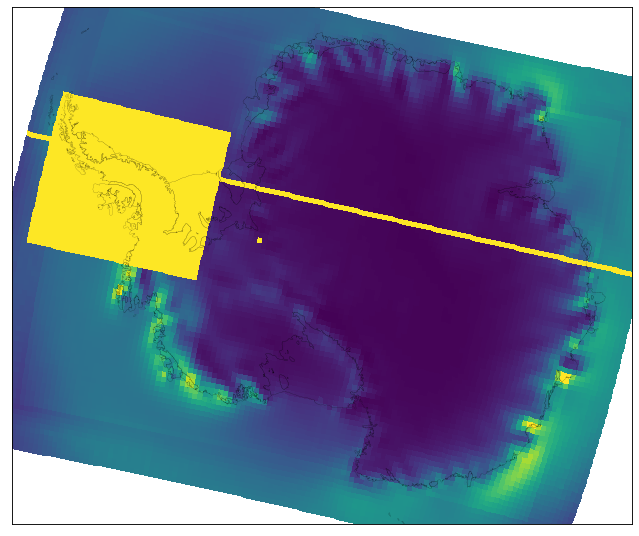

In [5]:
# Plotting the Average Daily Snowfall by Grid Cell
cube = metum_cube.collapsed('time',iris.analysis.MEAN)
antarctica_map = Basemap(width=6000000,height=5000000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='l')
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
cube.data[60,:]=1
cube.data[60,9]=0
cube.data[50,50]=1
cube.data[40:70,5:40]=1
pcolormesh_basemapplot(cube,antarctica_map,vmin=0,vmax=0.00005)